## Análise exploratória de dados - Artistas e músicas com mais streams no Spotify
O presente trabalho busca explorar e encontrar os artistas e músicas com mais streams no Spotify. <br>
O conjunto de dados utilizado pode ser acessado em https://www.kaggle.com/datasets/arnavvvvv/spotify-music <br>

Vale ressaltar que o conjunto de dados não está atualizado e, portanto, não condiz com a real quantidade de streams no dia da postagem desse projeto (26/03/2024). <br>

#### Importação de bibliotecas e leitura do conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set2', 10)
sns.set_style('whitegrid')

Devido a alguns erros foi necessários utilizar a codifição *ISO-8859-1*. <br>
Após esse processo foi necessário retirar missing values e NaN values. Colunas que não desncessárias também foram eliminadas a fim de facilitar a visualização do conjunto de dados.

In [2]:
df=pd.read_csv(r'C:\Users\luanb\Downloads\Popular_Spotify_Songs.csv', encoding='ISO-8859-1')
df.dropna(inplace=True)
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [3]:
df=df.drop(['in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1) #drop columns 


In [4]:
df #conjunto de dados resultante das operações anteriores

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322
...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
dtypes: int64(6), object(3)
memory usage: 63.8+ KB


#### Conversão de dados e limpeza do conjunto de dados

A coluna de maior interesse **streams**, apresenta Dtype de objeto e, por isso, não é possível realizar operações matemáticas. Dessa forma se faz necessário a conversão em integer. Float não se aplica dado que não existe 0,5 stream. <br>
Durante a conversão ocorreu um erro devido a presença de um valor que não se encaixava e foi necessário a retirada desse valor.

In [6]:
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '387570742', '1163093654', '496795686',
       '335222234', '363369738', '86444842', '52135248', '200647221',
       '115364561', '78300654', '899183384', '61245289', '429829812',
       '127408954', '22581161', '52294266', '843957510', '999748277',
       '618990393', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '570515054',
       '1647990401', '2565529693', '518745108', '107753850', '177740666',
       '153372011', '57876440', '256483385', '1214083358', '111947664',
       '156338624', '720434240', '357925728', '674072710', '1755214421',
       '404562836', '373199958', '14780425', '39578178', '54266102',
       '751134527', '1356565093', '1592909789', '635412045', '1230675890',
       '585695368', '43857627', '2009094673', '600976848', '39709

In [12]:
# Valor "estranho" 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' in streams
df = df.drop(df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index) 
df['streams']=df['streams'].astype(dtype=np.int64)
df.sort_values(by='streams', ascending=False, inplace=True, ignore_index=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams
0,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890
1,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550
2,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350
3,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922
4,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133
...,...,...,...,...,...,...,...,...,...
811,Rush,Troye Sivan,1,2023,7,13,864,78,22581161
812,Overdrive,Post Malone,1,2023,7,14,410,36,14780425
813,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641
814,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184


#### Visualização dos dados

Após a limpeza e conversão de valores, podemos iniciar a visuzalização dos dados utilizando as bibliotecas matplotlib e seaborn. <br>
Para que os gráficos fossem propriamente gerados utilizamos o método **GroupBy** para agrupar o total de streams de cada música e cada artistas. Também foi necessários limitar o DataFrame. Foram selecionados os 10 artistas e músicas com maiores quantidades de stream.

In [8]:
top_artists = pd.DataFrame(df.groupby(by='artist(s)_name')['streams'].sum())
top_artists.sort_values(by='streams', ascending=False, inplace=True)
top_artists=top_artists[0:10]
top_artists

,streams
artist(s)_name,
Taylor Swift,11851151082
Ed Sheeran,11051252012
Bad Bunny,8582384095
Eminem,6183805596
The Weeknd,6038640754
Harry Styles,6033490512
Imagine Dragons,5272484650
Adele,4508746590
SZA,4197341485


Com a limpeza desses dados podemos plotar em dois gráficos: gráfico de barras e gráfico em pizza. 

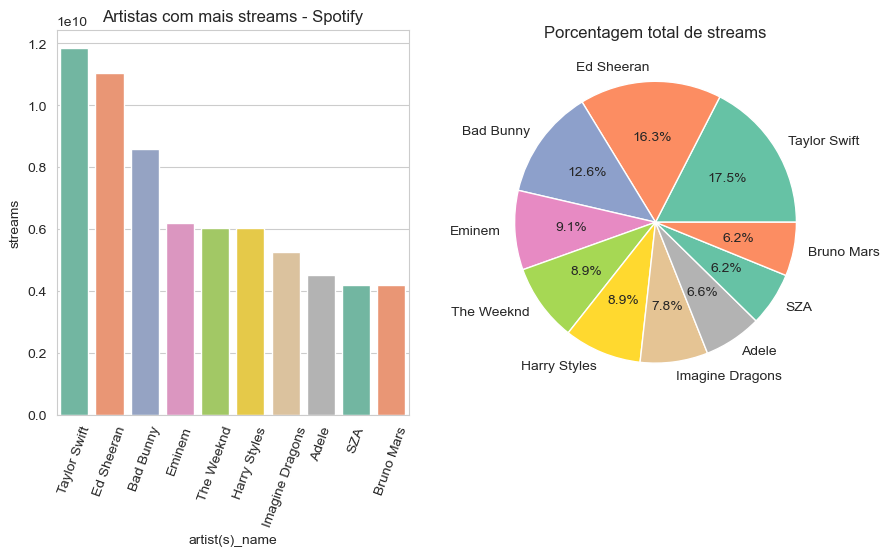

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
aa=sns.barplot(data=top_artists, x=top_artists.index, y='streams', errorbar=None, ax=axes[0])
ab = plt.pie(top_artists.streams, labels=top_artists.index, autopct='%1.1f%%')
aa.tick_params(axis='x', rotation=70)
axes[0].set_title('Artistas com mais streams - Spotify')
axes[1].set_title('Porcentagem total de streams')
plt.show()

A partir dos gráficos e dataframes acima podemos ver que Taylor Swift e Ed Sheeran conta com mais de 11 bilhões de streams totais. Esses dois artistas juntos detêm 33.8% do total de streams entre os top 10 artistas da plataforma. <br>

De maneira similar, podemos analisar as músicas com maiores streams na plataforma. Os process e operações necessárias para isso são elucidadas abaixo.<br>

In [10]:
top_songs = pd.DataFrame(df.groupby(by='track_name')['streams'].sum())
top_songs.sort_values(by='streams', ascending=False, inplace=True)
top_songs=top_songs[0:10]
top_songs

,streams
track_name,
Shape of You,3562543890
Sunflower - Spider-Man: Into the Spider-Verse,2808096550
One Dance,2713922350
STAY (with Justin Bieber),2665343922
Believer,2594040133
Closer,2591224264
Starboy,2565529693
Perfect,2559529074
Seï¿½ï¿½o,2484812918


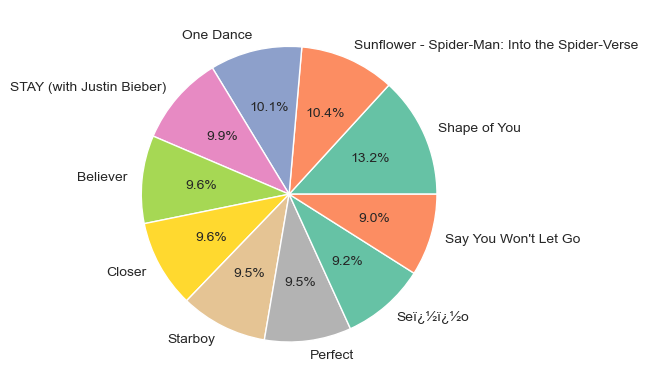

In [11]:
ac = plt.pie(top_songs.streams, labels=top_songs.index, autopct='%1.1f%%')
plt.show()

Ed Sheeran conta com maior número de streams em uma única música e, ao contrário do esperado, Taylor Swift não tem nenhuma música entre as 10 mais ouvidas no Spotify.